# Regression

Regression is a statistical concept studying any existing relationships between two or more variables. Machine Learning uses Regression to derive models for the sake of analysis, predictions and classifications of a data in interest.<br>
Usually, in regression problems, there is one dependent variable with at least one or more independent variables. The dependend variable is refered to as **predicted, label, class, or cluster** where the independed varialbe(s) is refered to as **predector(s), regressor(s), or featrue(s)**.

More often, data with one independed variable is not of great inetereset in _Machine Learning_ because:

- data collected from real time problems is affected by many factors. Data appeared to be affected by only one variable is prone to uncertinity and incompleteness or, in such case, is highly propable to be deceptive!

- data with one predector and one class can be solved with no much work. Actually, there is one closed form to derive the linear relationship between the predector and the class ** will be shown later **. Moreover, if that one variable appears to have a non-linear relationship with its class, this indicates another hidden feature. Sometimes, the model may produce a feature from the existing independent variable to produce a non-linear model.

Data is, usually, presented as an nd_array of featrues where each column holds a feature of the data and each row holds one instance from each feature. Classes, or depended vairable, are provided as a vector of values. The feature matrix is commonly known as ** Design Matrix**.<br>
It is important to say that Machine Learning techniques are applied to a sample from the space of the universe of the given data. If the whole universe of the data is available, then one can drow a function of order n-1, where n is the _universe size_, to pass by all the points of the data. Hence, it is not a learning problem rather than a calculus problem, a actually a tedious one!

This notebook tries to give a gentle introduction to the problem of regression in machine learning along with mathematical concepts underlying them. The code for implementing their algorithms is also availbel with a great help of Anaconda2 libraries.

### Building Up an Example

To start discussing linear regression, we should have an existing data to work on. Real dataset is, of course, preferable. There are large data houses where someone can target and play with. choosing a dataset is a critical decision! some of data available on the web might be corrupted, not properly collected, or some features are missin, therefore results are inappropriate or might have a weird sense.<br>
There are plenty of online data resources such as, just to name a few, Kaggle, Wikipedia Google could, Amazon cloud and of course Github.
This blog is useful to look at:
https://www.dataquest.io/blog/free-datasets-for-projects/


Fortunately, scikit learn library provides bunch of datasets ready to do analisys with.<br>
I am going, However, to choose the dataset given in the course assignments for regression problems. That is, kc_house_data.csv. I am going to import it as Panda dataframe so that it is easy to manipulate by scikit and numpy algorithms. Althought there are many other alternatives, working with Pandas data frames seems to be more convenient and the first choice to come in mind. Moreover, some other libraries, i.e. graphlab, requires a licence!

In [10]:
# Load Pandas to read the csv file. You should have that file and the ipython file in the same directory.
import pandas as pd

# This is a pretty function from Ipython library. It can be used print many formats including images as well!!
from IPython.display import display

file_name = 'kc_house_data.csv'
data = pd.read_csv(file_name)

# You can visualize the data by un/commenting the following statement:
#display(data)


### Linear Regression with only one variable

Let us start our discussion of regression algorithms on data having only one independent variable. Suppose that you are given the following data:

In [16]:
simple_model = {'x':[11, 23, 17, 14, 25, 18, 16, 20], 'y':[77, 103, 85, 81, 110, 91, 83, 93]}
simple_model_data_frame = pd.DataFrame(data=simple_model)

#display(df_one_variable_reg)

let us plot this data against the independent variable:

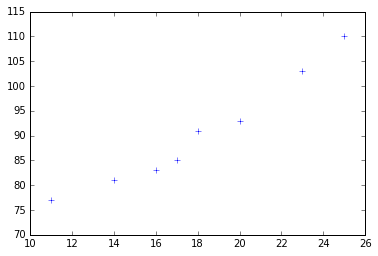

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.ylim(70,115)
plt.plot(simple_model_data_frame['x'], simple_model_data_frame['y'], '+')

for this simple dataset, a linear relationship between $x$ and $y$ is easily observed. _Is there a possibility to drow a line that matches all the $x$ points to their associated $y$ points?_ clearly the answer is _NO_. Data are not distributed uniformly along a straight line.

However, there exists lines such that the difference between the true $y$ and there predictions values $\hat{y}$ are minimal. This differene is refered to as __Residual Sum of error Squares or RSS.__

**How to come up with such line??**

to start deriving the equation, let us say that $\hat{B_0}$ and $\hat{B_1}$ represents the intercept and slope of the true model with minimal _RSS_. then:

The sum of squares of errors between true values and that line is:

$$S = \sum_{i=1}^n \epsilon^2 = \sum_{i=1}^n(y_i - \hat{y}_{i})^2$$
OR
$$S = \sum_{i=1}^n \epsilon^2 = \sum_{i=1}^n(y_i - (B_0 +B_1x_i))^2$$

Here, we are squaring the error for two main reasons:
- Some errors might be positives while others might be negatives. If we did not square them, they may cancel out each other.
- By squaring the error, we can come up with a useful formula to derive the optimal values of slope and intercept. ($x^2$) has a very nice property such that it has only one minimum , or maximum, point. Thus, it has a derivative of zero somewhere.

By optimizing these parameters to reach an optimal point for $S$.
Our main is to find a zero RSS or a minimum RSS. Therefore, we can equate RSS to zero and take derivative for both sides. the following equations are obtained.

So, for $B_0$:
$$\frac{\partial S}{\partial B_0} = -2\sum_{i=1}^n(y_i - \hat{B_0} - \hat{B_1}x_i)$$

and for $B_1$:
$$\frac{\partial S}{\partial B_1} = -2\sum_{i=1}^n(y_i - \hat{B_0} - \hat{B_1}x_i)x_i$$

Symplifying these two equations yields:

$$nB_0 + B_1 \sum_{i=1}^nx_i=\sum_{i=1}^n y_i$$

$$B_0\sum_{i=1}^nx_i + B_1 \sum_{i=1}^nx_i^2=\sum_{i=1}^n y_i x_i$$

These are called, _Normal Equatoins_. **Solving these equations for the unkowns:**



for the first equation, multiplying by $\sum_{i=0}^n x_i$

$$nB_0 \sum_{i=0}^n x_i + B_1 (\sum_{i=1}^n x_i)^2= \sum_{i=1}^n y_i \sum_{i=1}^n x_i$$

for the second equation, multiplying by $n$
$$nB_0\sum_{i=1}^n x_i + nB_1 \sum_{i=1}^nx_i^2= n \sum_{i=1}^n y_i x_i$$

subtracting both equations:

$$B_1(n \sum_{i=1}^n x_i^2 - (\sum_{i=0}^n x_i)^2) = n \sum_{i=1}^n y_i x_i - (\sum_{i=1}^n y_i \sum_{i=1}^n x_i)$$ 

Finally, $B_1$ is:

$$B_1 = \frac{n \sum_{i=1}^n y_i x_i - (\sum_{i=1}^n y_i \sum_{i=1}^n x_i)}{n \sum_{i=1}^n x_i^2 - (\sum_{i=0}^n x_i)^2}$$

We can, moreover, do the same to find $B_0$. But we know that $B_0$ is the intercept of the line. Therefore, after finding the slope of the line, we can use it to get the intercept from the following equation:

$$B_0 = \bar y - B_1 \bar x$$
where $\bar y$ represents the mean of the output vector and $\bar x$ represents the mean of the input vector as well.

We are, in this context, more convertable with $w_0, w_1$ notations to represent the weights of our model i.e. the slope and the intercept of the true model. Thus, we can write these equations as follows:

<br>

$$w_1 = \frac{n \sum_{i=1}^n y_i x_i - (\sum_{i=1}^n y_i \sum_{i=1}^n x_i)}{n \sum_{i=1}^n x_i^2 - (\sum_{i=1}^n x_i)^2}$$

<br>

$$w_0 = \bar y - w_1 \bar x$$

<br>

The following code will apply these formulas to come up with a linear model for any given data with one variable, x.

In [60]:
import numpy as np
#Algorithm 1

'''
:param x: The input vector of the dataset.
:param y: The ouput vector of the dataset.
:return: a tuple of (w0,w1) representing the slope and the intercept of the linear model.
'''

def linear_model_generator(x,y):
    #insure that the x and y vectors are numpy arrays:
    x = np.array(x)
    y = np.array(y)
    
    #setting up the equations parameters.
    n = len(x)
    xy_sum = (x*y).sum()
    x_sum = x.sum()
    y_sum = y.sum()
    x2_sum = (x*x).sum()
    x_mean = x.mean()
    y_mean = y.mean()
    
    #calculate slope
    numerator = (n*xy_sum - (y_sum * x_sum))
    denumerator = (n*x2_sum - x_sum**2)
    w1 = numerator/denumerator
    
    #calculate intercept
    w0 = y_mean - w1*x_mean
    
    return (w0,w1)
    

Let us come up with the model parameters, i.e. $w_0$, $w_1$, for our data set. 

In [58]:
model_parameters = linear_model_generator(simple_model['x'],simple_model['y'])
print 'model_parameters are:\nintercept:', model_parameters[0],' and slope:',model_parameters[1]

model_parameters are:
intercept: 54.375  and slope: 2


Let us visualize our model on the dataset:

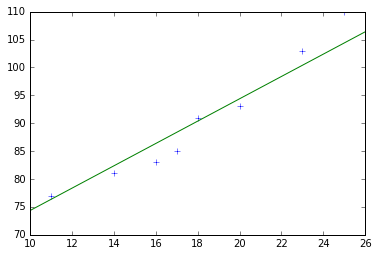

In [59]:
plt.plot(simple_model_data_frame['x'], simple_model_data_frame['y'], '+')

# this code is to get the x axis values.
axes = plt.gca()
x_vals = np.array(axes.get_xlim())

# this code is defining the model parameters
y_vals = model_parameters[0] + model_parameters[1] * x_vals

# this line is printing the line to the screen
plt.plot(x_vals, y_vals, '-')

plt.show()

An important measure charachterizing a model correctness is the **RSS**, the residual sum of error squares. We are claiming that our linear model just generated has the smallest RSS value among other linear models. The following code will output the RSS value for a given model, you can try other lines but RSS is never less than this model.

In [61]:



#Algorithm 2

def calculate_RSS (intercept, slope, input_data ,real_data_output):
    '''
    :param intercept: The intercept of the line.
    :param y: The slope of the line.
    :return: an RSS value.
    '''
    
